<a href="https://colab.research.google.com/github/koolganni/data-analysis-practice/blob/master/spotify-music-popularity-prediction-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Í∏ÄÎ°úÎ≤å ÏùåÏïÖ ÏãúÏû•Ïùò ÏµúÏã† Ìä∏Î†åÎìúÎ•º Î∞òÏòÅÌïú ÎÖ∏ÎûòÎ•º Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÍ≥º Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÎßåÎì§ Ïàò ÏûàÏùÑÍπå?



**[ÏöîÏïΩ]**

- **ÎπÑÏ¶àÎãàÏä§ Î¨∏Ï†ú :** Ïò¨Ìï¥ ÌïòÎ∞òÍ∏∞Ïóê Í∏ÄÎ°úÎ≤å ÏùåÏïÖ ÏãúÏû•ÏùÑ Í≤®ÎÉ•Ìïú ÎÖ∏ÎûòÎ•º Î∞úÌëúÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.

- **Ìï¥Í≤∞ Î∞©Ïïà :** ÏµúÏã† Í∏ÄÎ°úÎ≤å ÏùåÏïÖ Ìä∏Î†åÎìúÎ•º Î∂ÑÏÑùÌï¥ÏÑú Ïú†ÏùòÎØ∏Ìïú ÌäπÏßïÏùÑ Ï∞æÏïÑÎÇ¥ Ïã†Í≥° Í∏∞Ìöç Î∞è ÏûëÍ≥°Ïóê Î∞òÏòÅÌïòÍ≥† (Î†àÌçºÎü∞Ïä§ Ï†úÍ≥µ) ÎÖ∏ÎûòÍ∞Ä Í∏ÄÎ°úÎ≤å ÏùåÏïÖ ÏãúÏû•ÏóêÏÑú ÌûàÌä∏ Ïπ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùÑÏßÄ ÏòàÏ∏°Ìï¥ Î¥ÖÎãàÎã§.

- **Îç∞Ïù¥ÌÑ∞ :**  Spotify(Ïä§Ìè¨Ìã∞ÌååÏù¥) 2010~2021 Îß§ÎÖÑ Ïù∏Í∏∞Í≥° 2000Í∞úÏùò ÏµúÏã† Ïù∏Í∏∞ Îç∞Ïù¥ÌÑ∞

- **Ïª¨Îüº**ÏùÄ ÏïÑÌã∞Ïä§Ìä∏Î™Ö, ÎÖ∏Îûò Ï†úÎ™©, Î∞úÌëú ÏãúÍ∏∞, ÏùåÏïÖÏ†Å ÌäπÏßïÎì§, Ïù∏Í∏∞ÎèÑ (ÏµúÏã† Ïû¨ÏÉù ÌöüÏàò Ï†ïÎ≥¥ Î∞òÏòÅÎêú Ï†ïÎ≥¥Ïù¥Ïûê Î™®Îç∏Ïùò ÌÉÄÍ≤ü)

- **Í∞ÄÏÑ§ :** "Ïù∏Í∏∞ ÏûàÎäî ÎÖ∏ÎûòÍ∞Ä Í∞ñÍ≥† ÏûàÎäî Ïú†ÏùòÎØ∏Ìïú ÌäπÏÑ±Ïù¥ ÏûàÏùÑ Í≤ÉÏù¥Îã§."

- **Î™®Îç∏ ÏÑ†Ï†ï :** Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏

- **ÌÉÄÍ≤ü :** True(ÌûàÌä∏ Í∞ÄÎä•ÏÑ± ÏûàÏùå) False(Î≥¥ÌÜµ)

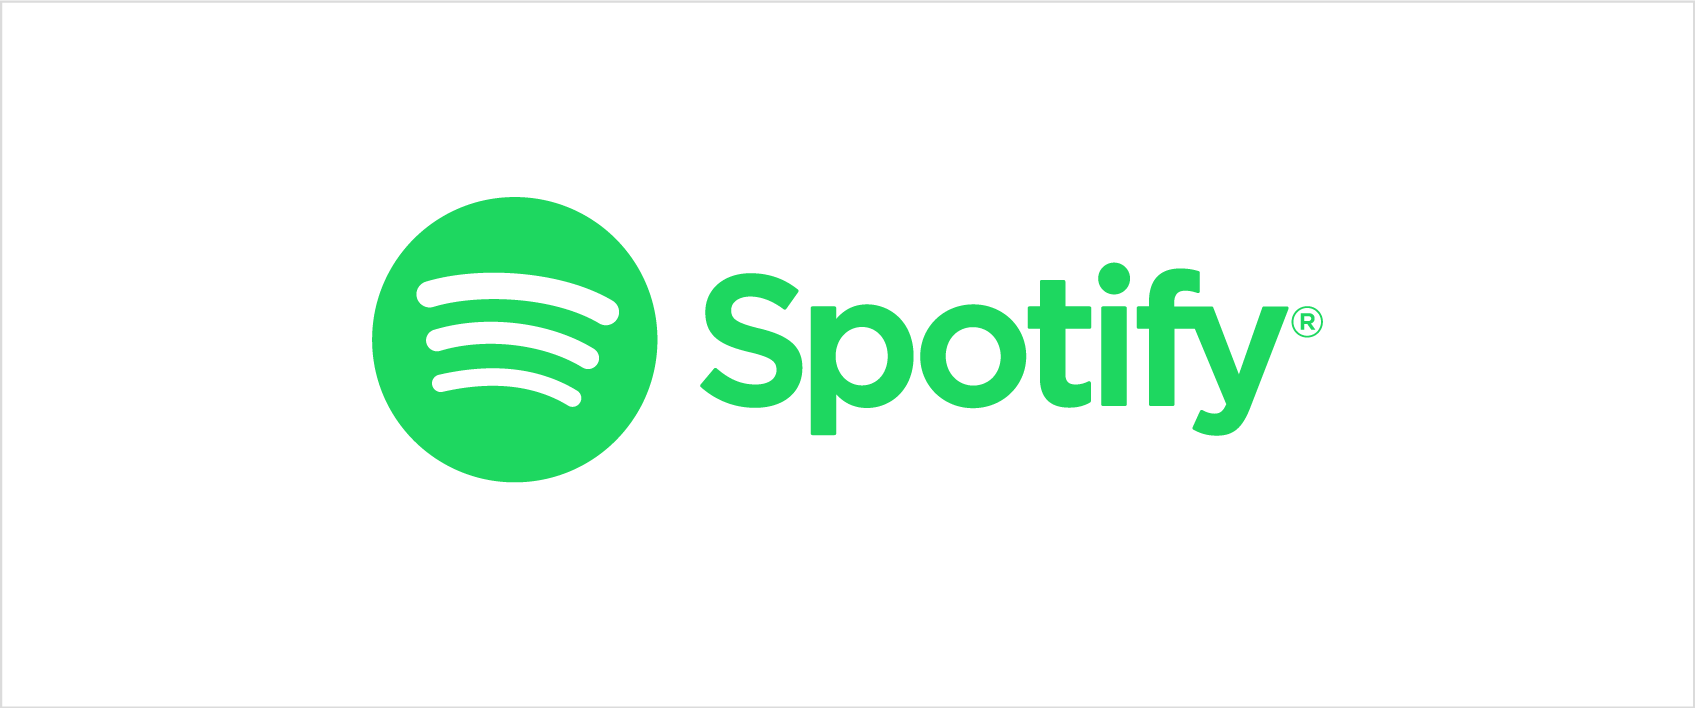

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install category_encoders==2.*
!pip install eli5
!pip install pandas-profiling==2.*
!pip install pdpbox
!pip install shap

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
from google.colab import files
import io

uploaded = files.upload()
df_track = pd.read_csv(io.BytesIO(uploaded['spotify_songs_data.csv']))
df_track.head()

Saving spotify_songs_data.csv to spotify_songs_data.csv


acousticness                artists  danceability  ...    tempo  valence  year
0        0.0330    ['Hogsnort Rupert']         0.430  ...  177.700    0.964  2010
1        0.0190          ['Davenport']         0.628  ...  149.826    0.634  2010
2        0.0595        ['Chris Mills']         0.658  ...   82.239    0.711  2010
3        0.1470           ['Maroon 5']         0.603  ...  149.955    0.295  2010
4        0.0302  ['Never Shout Never']         0.684  ...  125.974    0.368  2010

[5 rows x 19 columns]

In [4]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28589 entries, 0 to 28588
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      28589 non-null  float64
 1   artists           28589 non-null  object 
 2   danceability      28589 non-null  float64
 3   duration_ms       28589 non-null  int64  
 4   energy            28589 non-null  float64
 5   explicit          28589 non-null  int64  
 6   id                28589 non-null  object 
 7   instrumentalness  28589 non-null  float64
 8   key               28589 non-null  int64  
 9   liveness          28589 non-null  float64
 10  loudness          28589 non-null  float64
 11  mode              28589 non-null  int64  
 12  name              28589 non-null  object 
 13  popularity        28589 non-null  int64  
 14  release_date      28589 non-null  object 
 15  speechiness       28589 non-null  float64
 16  tempo             28589 non-null  float6

## EDAÏôÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [5]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌååÏïÖ
from pandas_profiling import ProfileReport

profile = ProfileReport(df_track, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ 
  - id Ïª¨Îüº Ï†úÏô∏ ÌïòÍ≥† Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ (Í∞ôÏùÄ ÎÖ∏ÎûòÎ°ú Î¥êÎèÑ Î¨¥Î∞©) *Í∞ÄÏû• ÎÜíÏùÄ popularity Î•º Í∞ñÎäî Í¥ÄÏ∏°ÏπòÎßå ÎÇ®Í∏∞Í∏∞



In [6]:
def drop_duplicate_track(df):
  df['track'] = df['artists'] + df['name']
  indices = []

  for track in df['track'].unique():
    subset = df[(df['track'] == track)]
    if len(subset) == 1:
      continue
    max_pop = subset['popularity'].max() # Ï§ëÎ≥µ ÎÖ∏Îûò Ï§ë Í∞ÄÏû• ÎÜíÏùÄ popularity
    index = subset[(subset['popularity'] == max_pop)].index[0] 
    indices.append(index)

  df_temp = df.loc[indices]

  df.drop(columns=['id', 'track'], inplace=True)
  df = df[(~df.duplicated() == 1)]

  df_temp.drop(columns=['id', 'track'], inplace=True)
  df = pd.concat([df, df_temp]).drop_duplicates().reset_index(drop=True)

  return df

In [7]:
df_track = drop_duplicate_track(df_track)

- Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
  - EDA Í≥ºÏ†ïÏóêÏÑú ÏùòÎØ∏Î•º ÌååÏïÖÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌòï

In [8]:
def get_categorical_features(df):
  # key
  mapping = {
      0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F', 6: 'F#/Gb', 
      7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'
  }
  df['key'].replace(mapping, inplace=True)

  # mode
  df['mode'].replace({0: 'minor', 1: 'major'}, inplace=True)

  # explicit
  df['explicit'].replace({0: 'False', 1: 'True'}, inplace=True)

  return df

In [9]:
df_eda = df_track.copy()
df_eda = get_categorical_features(df_eda)

In [10]:
df_eda.head()

acousticness                artists  danceability  ...    tempo  valence  year
0        0.0330    ['Hogsnort Rupert']         0.430  ...  177.700    0.964  2010
1        0.0190          ['Davenport']         0.628  ...  149.826    0.634  2010
2        0.0595        ['Chris Mills']         0.658  ...   82.239    0.711  2010
3        0.1470           ['Maroon 5']         0.603  ...  149.955    0.295  2010
4        0.0302  ['Never Shout Never']         0.684  ...  125.974    0.368  2010

[5 rows x 18 columns]

In [11]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26247 entries, 0 to 26246
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      26247 non-null  float64
 1   artists           26247 non-null  object 
 2   danceability      26247 non-null  float64
 3   duration_ms       26247 non-null  int64  
 4   energy            26247 non-null  float64
 5   explicit          26247 non-null  object 
 6   instrumentalness  26247 non-null  float64
 7   key               26247 non-null  object 
 8   liveness          26247 non-null  float64
 9   loudness          26247 non-null  float64
 10  mode              26247 non-null  object 
 11  name              26247 non-null  object 
 12  popularity        26247 non-null  int64  
 13  release_date      26247 non-null  object 
 14  speechiness       26247 non-null  float64
 15  tempo             26247 non-null  float64
 16  valence           26247 non-null  float6

- EDA
  - ÌûàÌä∏Í≥° ÌôïÏù∏
  - Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
  - coefficient (heatmap) ÌôïÏù∏ ‚Üí ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïú†Ï∂î

In [12]:
# ÏµúÏã† ÌûàÌä∏Í≥° ÌôïÏù∏
df_eda.groupby('name')['popularity'].mean().sort_values(ascending=False).head(15)

name
drivers license                    100.0
Mood (feat. iann dior)              96.0
positions                           96.0
Whoopty                             94.0
LA NOCHE DE ANOCHE                  94.0
Therefore I Am                      94.0
34+35                               94.0
WITHOUT YOU                         94.0
D√ÅKITI                              93.0
you broke me first                  93.0
What You Know Bout Love             93.0
WAP (feat. Megan Thee Stallion)     92.0
Anyone                              92.0
HOLIDAY                             92.0
Lonely (with benny blanco)          92.0
Name: popularity, dtype: float64

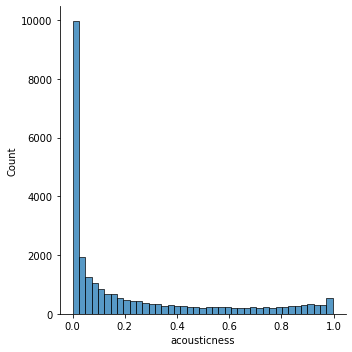

In [13]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î∞è Ïù¥ÏÉÅÏπò ÌôïÏù∏
sns.displot(df_eda['acousticness']);

üëâ Ïñ¥Ïø†Ïä§Ìã±Ïù¥ ÏïÑÎãå ÎÖ∏ÎûòÍ∞Ä Ìõ®Ïî¨ ÎßéÏäµÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

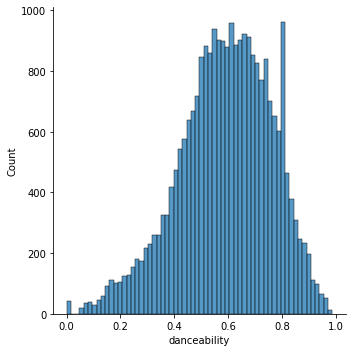

In [14]:
sns.displot(df_eda['danceability']);

üëâ ÎåÑÏä§Í≥°ÏûÑÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌäπÏÑ±ÏùÄ Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Î™®ÏäµÏûÖÎãàÎã§. ÎåÄÏ≤¥Î°ú ÎåÑÏä§Í∞Ä Í∞ÄÎä•Ìïú ÎÖ∏ÎûòÍ∞Ä Îçî ÎßéÏäµÎãàÎã§. danceability Í∞Ä 0Ïù∏ ÎÖ∏ÎûòÎèÑ ÏûàÏäµÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

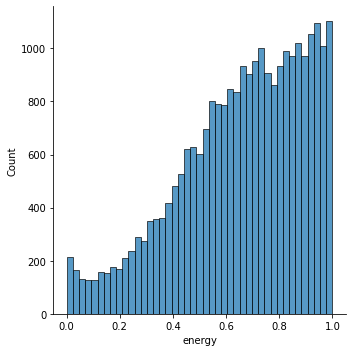

In [15]:
sns.displot(df_eda['energy']);

üëâ energy Í∞Ä Í∞ïÌïú, Ï¶â Í∏¥Ïû•Í∞ê ÏûàÍ≥† Ïï°Ìã∞Î∏åÌïú ÎÖ∏ÎûòÍ∞Ä ÎßéÏäµÎãàÎã§. Îã§ÏÜå left skewed Îêú Î∂ÑÌè¨Ïùò Î™®ÏäµÏûÖÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

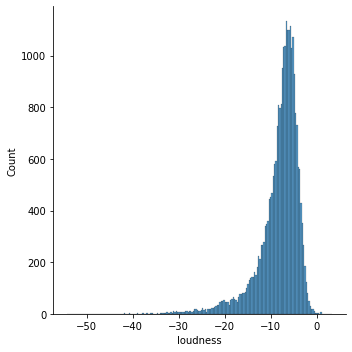

In [16]:
sns.displot(df_eda['loudness']);

üëâ ÎÖ∏ÎûòÏùò dB(Îç∞ÏãúÎ≤®)ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî loudness ÌäπÏÑ±ÏùÄ -10 ÏóêÏÑú 0 ÏÇ¨Ïù¥Ïùò ÏùåÏõêÏù¥ ÎßéÏäµÎãàÎã§. left skewed Îêú Î∂ÑÌè¨Ïùò Î™®ÏäµÏûÖÎãàÎã§. ÏùºÎ∞òÏ†ÅÏù∏ ÎÖ∏ÎûòÏùò Îç∞ÏãúÎ≤® Î≤îÏúÑÎäî -60ÏóêÏÑú 0Ïù¥ÎØÄÎ°ú ÌäπÎ≥ÑÌïú Ïù¥ÏÉÅÏπòÎäî ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

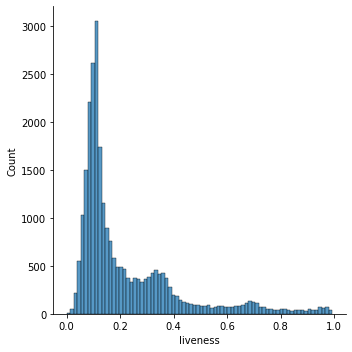

In [17]:
sns.displot(df_eda['liveness']);

üëâ ÎÖ∏ÎûòÏóêÏÑú ÎùºÏù¥Î∏åÎ°ú Îì§Î¶¨Îäî Î∂ÄÎ∂ÑÏùò ÎπÑÏ§ëÏùÑ ÎÇòÌÉÄÎÇ¥Îäî liveness ÌäπÏÑ±Ïùò Î∂ÑÌè¨Î•º Î≥¥Î©¥, ÏïΩ 0.1Ïù∏ ÎÖ∏ÎûòÍ∞Ä ÎßéÏäµÎãàÎã§. Ï¶â, Í±∞Ïùò ÎùºÏù¥Î∏åÎ°ú Îì§Î¶¨ÏßÄ ÏïäÍ≥† ÎÖπÏùåÎêú ÏùåÏõêÏù∏ Í≤ÉÏù¥ ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. 0.8Ïù¥ ÎÑòÏñ¥Í∞ÄÎäî ÏùåÏõêÎèÑ Ï°¥Ïû¨Ìï©ÎãàÎã§. ÏΩòÏÑúÌä∏ Î≤ÑÏ†Ñ ÏùåÏõê Í∞ôÏùÄ Í≤ÉÏùÄ Ïù¥Ïóê Ìï¥ÎãπÌï† Í≤ÉÏúºÎ°ú Ï∂îÏ∏°Îê©ÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

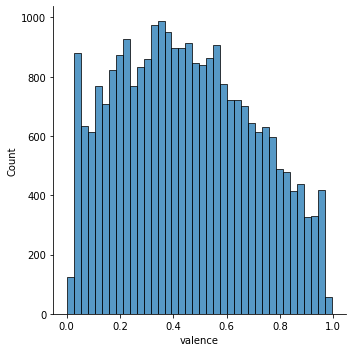

In [18]:
sns.displot(df_eda['valence']);

üëâ ÎÜíÏùÄ valence Îäî ÎÖ∏ÎûòÍ∞Ä happy, cheerful, euphoric ÌïòÍ≥† ÎÇÆÏùÄ valence Îäî ÎÖ∏ÎûòÍ∞Ä sad, depressed, angry Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. ÏùåÏõêÏúºÎ°ú Îì±Î°ùÎêú ÎÖ∏ÎûòÎäî valence Í∞Ä ÎÇÆÏùÄ ÎÖ∏ÎûòÍ∞Ä Ï¢Ä Îçî ÎßéÏïÑ Î≥¥ÏûÖÎãàÎã§. 0.1Ïù∏ ÏùåÏõêÎèÑ Îã§Ïàò ÏûàÏúºÎÇò ÎåÄÏ≤¥Î°ú valence Í∞Ä Ï§ëÍ∞ÑÏù∏ ÎÖ∏ÎûòÍ∞Ä ÎßéÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

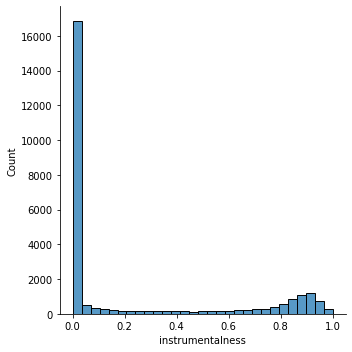

In [19]:
sns.displot(df_eda['instrumentalness']);

üëâ instrumentalness Í∞Ä 0Ïù∏, Í∞ÄÏÇ¨Í∞Ä ÏûàÎäî ÎÖ∏ÎûòÍ∞Ä ÎßéÏäµÎãàÎã§. Î≥¥Ïª¨Ïù¥ Îî∞Î°ú ÏóÜÎäî ÎÖ∏ÎûòÎèÑ Ï°¥Ïû¨Ìï©ÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

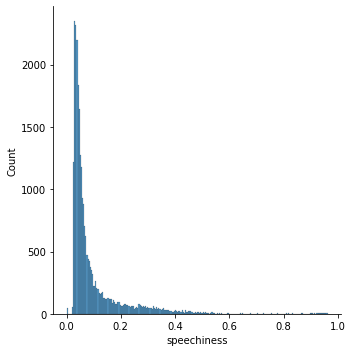

In [20]:
sns.displot(df_eda['speechiness']);

üëâ ÎÖ∏ÎûòÏóê speech Í∞Ä Ìè¨Ìï®Îêú ÏùåÏõêÏùÄ ÎßéÏù¥ ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. right skewed Îêú Î∂ÑÌè¨Ïùò Î™®ÏäµÏûÖÎãàÎã§. 0~1 Íµ¨Í∞Ñ ÎÇ¥Ïóê Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò Î∂ÑÌè¨ÌïòÍ≥† ÏûàÍ≥† Ïù¥ÏÉÅÏπòÎäî Îî∞Î°ú ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

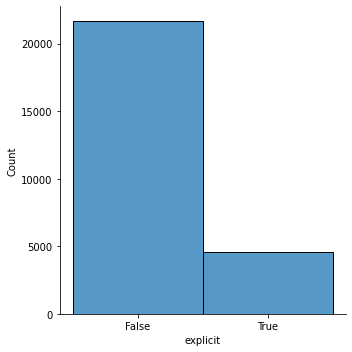

In [21]:
sns.displot(df_eda['explicit']);

üëâ ÎÖ∏Îûò Í∞ÄÏÇ¨Ïóê ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®Îêú ÎÖ∏ÎûòÎäî Í∑∏Î†áÏßÄ ÏïäÏùÄ ÎÖ∏ÎûòÏùò Í∞úÏàòÏùò 25%Ïóê Î™ª ÎØ∏ÏπòÎäî ÏñëÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§.

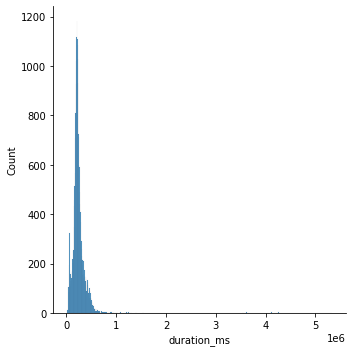

In [22]:
sns.displot(df_eda['duration_ms']);

üëâ ÎÖ∏ÎûòÏùò Í∏∏Ïù¥Í∞Ä 1,000,000 ms (ÏïΩ 16Î∂Ñ) Ïù¥ÎÇ¥Ïù∏ ÏùåÏõêÏù¥ ÎßéÏù¥ Î≥¥ÏûÖÎãàÎã§. Í∑∏ Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ÎèÑ Ï°¥Ïû¨ÌïòÎäîÎç∞ ÏïΩ 80Î∂ÑÏùò Í∏∏Ïù¥Î•º Í∞ñÎäî ÏùåÏõêÎèÑ ÏûàÏäµÎãàÎã§. ÏùºÎ∞òÏ†ÅÏù∏ ÏùåÏõêÏùò Í∏∏Ïù¥ÏôÄÎäî Í±∞Î¶¨Í∞Ä Î©ÄÏñ¥ Î≥¥Ïù¥ÎäîÎç∞, ÏΩòÏÑúÌä∏ ÌíÄÎ≤ÑÏ†Ñ ÏùåÏõê Í∞ôÏùÄ Í±∏ÍπåÏöî? ÌòπÏùÄ ÌÅ¥ÎûòÏãù ÏùåÏïÖ Ï§ë ÌïòÎÇòÏùºÍπåÏöî? duration Ïù¥ Í∏¥ ÏùåÏõêÎì§ÏùÑ Ï¢Ä Îçî ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

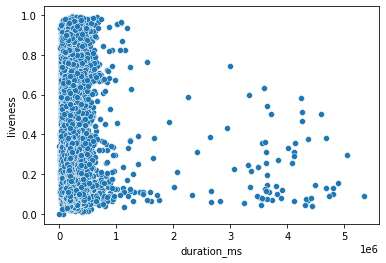

In [23]:
sns.scatterplot(data=df_eda, x='duration_ms', y='liveness');

üëâ duration Ïù¥ Í∏¥ ÏùåÏõê Ï§ë ÎùºÏù¥Î∏åÏù∏ ÏùåÏõêÏù¥ ÎßéÏßÄÎäî ÏïäÏïÑ Î≥¥ÏûÖÎãàÎã§. ÎåÄÎ∂ÄÎ∂Ñ liveness Í∞Ä 0.6 ÏïÑÎûòÏù∏ ÏùåÏõêÎì§ÏûÖÎãàÎã§.

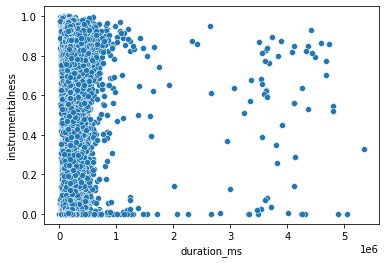

In [24]:
sns.scatterplot(data=df_eda, x='duration_ms', y='instrumentalness');

üëâ duration Ïù¥ Í∏¥ ÏùåÏõê Ï§ë inst Ïù∏ ÏùåÏõêÏùÄ Ï°¥Ïû¨ÌïòÎÇò, duration Ïù¥ ÏßßÏùÄ ÏùåÏõêÎ≥¥Îã§ ÎßéÏùÄ ÏñëÏùÄ ÏïÑÎãôÎãàÎã§.

In [25]:
# ÎÖ∏Îûò Í∏∏Ïù¥Í∞Ä 16Î∂ÑÏù¥ ÎÑòÎäî ÏùåÏõêÏùò Í∞úÏàò
len(df_track[df_eda['duration_ms'] > 1000000])

112

üëâ ÏúÑ Í∑∏ÎûòÌîÑÎì§ÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÎ°ú 0~1,000,000ms ÏÇ¨Ïù¥Ïùò duration ÏùÑ Í∞ñÍ≥† ÏûàÏäµÎãàÎã§. 1,000,000ms Î•º ÎÑòÎäî ÏùåÏõêÏùò Í∞úÏàòÎäî 112Í∞úÎ°ú Ïù¥ÏÉÅÏπòÎ°ú Ï∑®Í∏âÌï¥ÏÑú Ï†úÍ±∞Ìï¥ÎèÑ ÌÅ∞ Î¨∏Ï†úÎäî ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§.

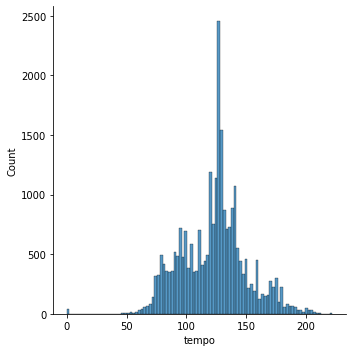

In [26]:
sns.displot(df_eda['tempo']);

üëâ ÎÖ∏ÎûòÏùò ÌÖúÌè¨(BPM)Îäî ÏïΩ 125 BPMÏù¥ Í∞ÄÏû• ÎßéÏùÄ Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπåÏö¥ Î™®ÏäµÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏäµÎãàÎã§. 0 BPMÎèÑ Î≥¥Ïù¥ÎäîÎç∞, Ïù¥Îäî ÎÖ∏ÎûòÏùò Îπ†Î•¥Í∏∞Í∞Ä 0Ïù¥ÎùºÎäî ÏùòÎØ∏Î°ú ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú ÎßûÏßÄ ÏïäÏïÑ Î≥¥ÏûÖÎãàÎã§.

In [27]:
len(df_track[df_eda['tempo'] == 0])

43

üëâ ÌÖúÌè¨Í∞Ä 0Ïù∏ ÏùåÏõêÏù¥ 43Í∞ú Ï°¥Ïû¨Ìï©ÎãàÎã§. Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÌïòÍ≥† Ï†úÍ±∞ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÍ≤†ÏäµÎãàÎã§.

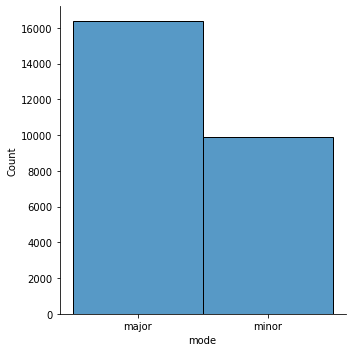

In [28]:
sns.displot(df_eda['mode']);

üëâ Major(Ïû•Ï°∞)Î°ú ÏãúÏûëÌïòÎäî ÎÖ∏ÎûòÍ∞Ä Îçî ÎßéÏäµÎãàÎã§. Minor(Îã®Ï°∞)Î°ú ÏãúÏûëÌïòÎäî ÎÖ∏ÎûòÎäî Ïû•Ï°∞Î°ú ÏãúÏûëÌïòÎäî ÎÖ∏ÎûòÏùò Î∞òÏùÑ Ï°∞Í∏à ÎÑòÎäî ÏñëÏûÖÎãàÎã§.

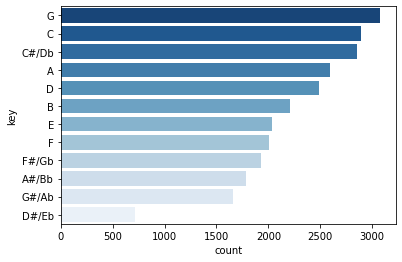

In [29]:
order = df_eda['key'].value_counts().index
sns.countplot(data=df_eda, y='key', order=order, palette='Blues_r');

üëâ ÎÖ∏ÎûòÏùò Î©îÏù∏ Key Í∞Ä G, C, C# ÏàúÏúºÎ°ú Í∞ÄÏû• ÎßéÏäµÎãàÎã§. D# Ïù¥ Î©îÏù∏ Key Ïù∏ ÎÖ∏ÎûòÍ∞Ä Í∞ÄÏû• Ï†ÅÏäµÎãàÎã§.

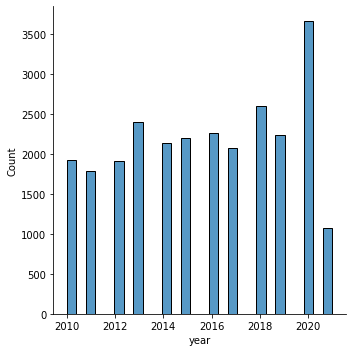

In [30]:
sns.displot(df_eda['year']);

üëâ ÏùåÏõê Î∞úÎß§ Ïó∞ÎèÑÍ∞Ä 2010~2021 Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§. 2020ÎÖÑÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏû• ÎßéÏäµÎãàÎã§. 2021ÎÖÑÏùÄ ÏïÑÏßÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏù¥ ÏåìÏù¥ÏßÄ ÏïäÏïÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÏñ¥ Î≥¥ÏûÖÎãàÎã§.

- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
  - ÌïôÏäµÏóê ÌïÑÏöî ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
  - Ïù¥ÏÉÅÏπò Ï†úÍ±∞
  - Îç∞Ïù¥ÌÑ∞ Îã®ÏúÑ Î≥ÄÍ≤Ω

In [31]:
def preprocess(df):
  # ÌïôÏäµÏóê ÌïÑÏöî ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ ('name', 'release_date')
  df.drop(columns=['name', 'release_date'], inplace=True)

  # Ïù¥ÏÉÅÏπò Ï†úÍ±∞
  # ÎÖ∏Îûò Í∏∏Ïù¥(duration_ms) : 16Î∂ÑÏù¥ ÎÑòÏúºÎ©¥ Ï†úÍ±∞
  df.drop(df[(df['duration_ms'] > 1000000)].index, inplace=True)
  # ÎÖ∏Îûò Îπ†Î•¥Í∏∞(tempo) : 0Ïù¥Î©¥ Ï†úÍ±∞
  df.drop(df[(df['tempo'] == 0)].index, inplace=True)

  # duration_ms -> duration_m : ÎÖ∏Îûò Í∏∏Ïù¥Î•º ms Îã®ÏúÑÍ∞Ä ÏïÑÎãå m(Î∂Ñ) Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
  df['duration_m'] = df['duration_ms'] / (1000*60)
  df.drop(columns=['duration_ms'], inplace=True)

  return df

In [32]:
df_track = preprocess(df_track)

In [33]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26092 entries, 0 to 26246
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      26092 non-null  float64
 1   artists           26092 non-null  object 
 2   danceability      26092 non-null  float64
 3   energy            26092 non-null  float64
 4   explicit          26092 non-null  int64  
 5   instrumentalness  26092 non-null  float64
 6   key               26092 non-null  int64  
 7   liveness          26092 non-null  float64
 8   loudness          26092 non-null  float64
 9   mode              26092 non-null  int64  
 10  popularity        26092 non-null  int64  
 11  speechiness       26092 non-null  float64
 12  tempo             26092 non-null  float64
 13  valence           26092 non-null  float64
 14  year              26092 non-null  int64  
 15  duration_m        26092 non-null  float64
dtypes: float64(10), int64(5), object(1)
memo

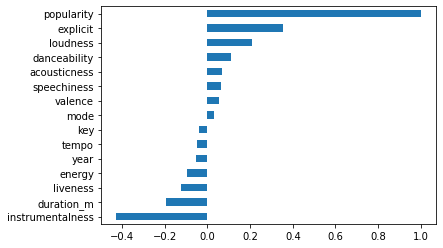

In [34]:
# ÌÉÄÍ≤üÍ≥º ÌäπÏÑ±Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàò
df_track.corr().loc['popularity'].sort_values().plot.barh();

üëâ Numerical Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÎäî ÌÉÄÍ≤üÏù∏ popularity Î•º Ï†úÏô∏ÌïòÍ≥† explicit(Í∞ÄÏÇ¨Ïóê ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö© Ìè¨Ìï®), loudness(Îç∞ÏãúÎ≤® ÌÅ¨Í∏∞), danceability(ÎåÑÏä§Ïóê Ïñ¥Ïö∏Î¶¨Îäî Ï†ïÎèÑ) Îì±Ïùò ÌäπÏÑ±Ïù¥ ÌÉÄÍ≤üÍ≥º ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Î©∞, Î∞òÎåÄÎ°ú instrumentalness(Í∞ÄÏÇ¨ ÏóÜÎäî Ï†ïÎèÑ), duration_m(ÎÖ∏Îûò Í∏∏Ïù¥) Îì±Ïùò ÌäπÏÑ±Ïù¥ ÌÉÄÍ≤üÍ≥º ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥ÏûÖÎãàÎã§.

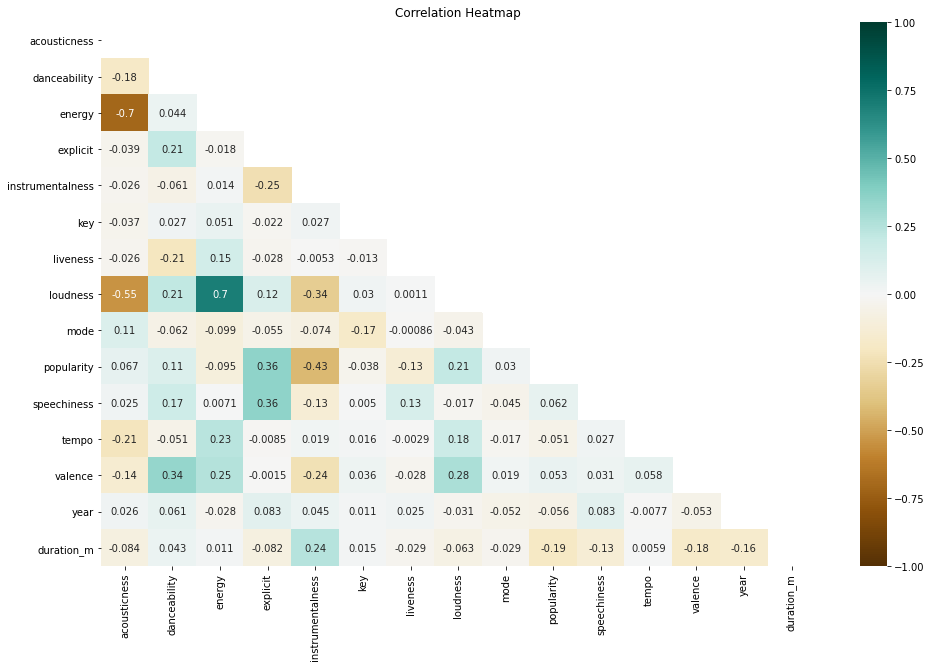

In [35]:
# Ï†ÑÏ≤¥ Coefficient ÌôïÏù∏
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(df_track.corr(), dtype=np.bool))
sns.heatmap(df_track.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG').set_title('Correlation Heatmap');

üëâ ÌÉÄÍ≤üÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌäπÏÑ±Îì§ ÏÇ¨Ïù¥ÏóêÏÑúÎèÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§.
- Îç∞ÏãúÎ≤®Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÎåÑÏä§Í≥°Ïóê Ïñ¥Ïö∏Î¶¨Îäî ÎÖ∏ÎûòÏù¥Í≥† ÎÖ∏ÎûòÏùò Î∂ÑÏúÑÍ∏∞Í∞Ä Î∞ùÏùÄ ÎäêÎÇåÏûÖÎãàÎã§.
- ÎÖ∏Îûò Í∏∏Ïù¥Í∞Ä Í∏∏ÏàòÎ°ù Í∞ÄÏÇ¨Í∞Ä ÏóÜÎäî Inst. Î≤ÑÏ†ÑÏùò ÎÖ∏ÎûòÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.
- Îç∞ÏãúÎ≤®Ïù¥ ÎÜíÍ≥† ÌÖúÌè¨ÎèÑ Îπ®ÎùºÏßàÏàòÎ°ù ÎÖ∏ÎûòÏóê Í∏¥Ïû•Í∞êÏù¥ ÏûàÍ≥† Ïï°Ìã∞Î∏åÌïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

- Data leakage ÌôïÏù∏

üëâ Îç∞Ïù¥ÌÑ∞Ïùò ÌÉÄÍ≤üÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌäπÏÑ±Îì§Ïùò Í≤ΩÏö∞ ÌÉÄÍ≤ü Ï†ïÎ≥¥ ÎàÑÏàòÎ•º ÎßåÎì§ÎßåÌïú Í≤ÉÏùÄ ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§. Î™®Îëê ÌÉÄÍ≤ü Ï†ïÎ≥¥Î•º ÏñªÍ∏∞ Ïù¥Ï†ÑÏóê Ïïå Ïàò ÏûàÎäî Ï†ïÎ≥¥Îì§ÏûÖÎãàÎã§.

- Feature Engineering
  - ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
  - ÏÉàÎ°úÏö¥ Ïú†ÏùòÎØ∏Ìïú ÌîºÏ≤ò Ï∂îÍ∞Ä, ÌïÑÏöî ÏóÜÎäî ÌîºÏ≤ò Ï†úÍ±∞

>'Ïû•Î•¥'ÎèÑ ÎÖ∏ÎûòÏùò Îß§Ïö∞ Ï§ëÏöîÌïú ÌäπÏÑ±Ïù¥Îùº ÏÉùÍ∞ÅÌï©ÎãàÎã§. Îî∞ÎùºÏÑú ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨Ìïú ÌîºÏ≤òÎ•º Í∞ñÍ≥† ÏûàÎäî 'Ïû•Î•¥ Îç∞Ïù¥ÌÑ∞'Î•º Í∞ÄÏ†∏ÏôÄÏÑú Îß§ÌïëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [36]:
# Ïû•Î•¥ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
uploaded = files.upload()
df_genre = pd.read_csv(io.BytesIO(uploaded['genres_data.csv']))
df_genre.head()

Saving genres_data.csv to genres_data.csv


genres  acousticness  danceability  ...  popularity  key  mode
0  21st century classical      0.754600      0.284100  ...    6.600000    4     1
1                   432hz      0.485515      0.312000  ...   41.200000   11     1
2                   8-bit      0.028900      0.673000  ...    0.000000    5     1
3                      []      0.535793      0.546937  ...   12.350770    7     1
4              a cappella      0.694276      0.516172  ...   39.086248    7     1

[5 rows x 14 columns]

Í∞Å Ïû•Î•¥Í∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî ÏùºÎ∞òÏ†ÅÏù∏ ÏùåÏïÖÏ†Å ÌäπÏßïÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Î°ú acousticness, danceability, energy, tempo Îì± Í∏∞Ï°¥ Ïä§Ìè¨Ìã∞ÌååÏù¥ ÎÖ∏Îûò Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨Ìïú ÌîºÏ≤òÎ•º Í∞ñÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Ïä§Ìè¨Ìã∞ÌååÏù¥ ÎÖ∏ÎûòÏùò Ïû•Î•¥ ÌäπÏÑ±ÏùÑ ÏòàÏ∏°Ìï¥ÏÑú Ï∂îÍ∞ÄÌï¥Î≥¥Í≥† Ïã∂ÏäµÎãàÎã§.

In [37]:
df_genre['duration_m'] = df_genre['duration_ms'] / (1000*60)
df_genre.drop(columns=['duration_ms'], inplace=True)

In [38]:
genre_columns = df_genre.columns.drop(['genres', 'popularity', 'key', 'mode'])
X_genre_train = df_genre[genre_columns]
X_genre_test = df_track[genre_columns]
y_genre_train = df_genre[['genres']]

In [39]:
from sklearn.neighbors import KNeighborsClassifier

genre_clf = KNeighborsClassifier()
genre_clf.fit(X_genre_train, np.ravel(y_genre_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_genre_pred = genre_clf.predict(X_genre_test)
y_genre_pred

array(['argentine metal', 'mod revival', 'boston indie', ...,
       'classic czech pop', 'contemporary classical piano',
       'barockinterpreten'], dtype=object)

In [41]:
genres = y_genre_pred.T
df_track['genre'] = genres
df_track.head()

acousticness                artists  ...  duration_m             genre
0        0.0330    ['Hogsnort Rupert']  ...    2.947550   argentine metal
1        0.0190          ['Davenport']  ...    3.533883       mod revival
2        0.0595        ['Chris Mills']  ...    4.237333      boston indie
3        0.1470           ['Maroon 5']  ...    3.775117    australian ska
4        0.0302  ['Never Shout Never']  ...    2.842667  australian metal

[5 rows x 17 columns]

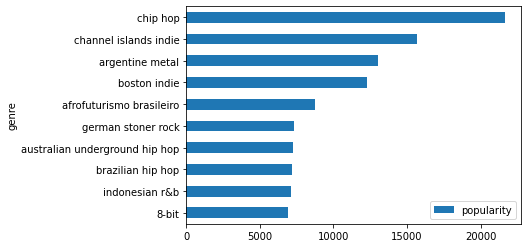

In [42]:
# Ïù∏Í∏∞ Ïû•Î•¥ ÌôïÏù∏ (2010~2021 ÎÇòÏò® ÎÖ∏Îûò)
genre_grp = df_track.groupby(['genre'])
genre_top = genre_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:10]
genre_top.sort_values(by=['popularity']).plot.barh();

üëâ ÌûôÌï© Ïû•Î•¥ Ï§ë ÌïòÎÇòÏù∏ chip hop Ïù¥ Í∞ÄÏû• ÌÅ∞ ÎàÑÏ†Å popularity Î•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Í∑∏ Îã§ÏùåÏúºÎ°úÎäî Ïù∏Îîî, Î©îÌÉà Ïû•Î•¥, ÎùΩ Ïû•Î•¥, Îã§Î•∏ Ï¢ÖÎ•òÏùò ÌûôÌï© Ïû•Î•¥, R&B Ïû•Î•¥Í∞Ä ÏûàÏäµÎãàÎã§.

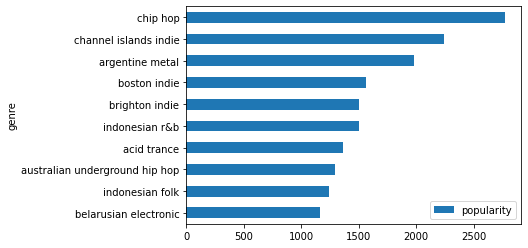

In [43]:
# Ïù∏Í∏∞ Ïû•Î•¥ ÌôïÏù∏ (2020 ÎÖ∏Îûò)
genre_grp = df_track[(df_track['year'] == 2020)].groupby(['genre'])
genre_top = genre_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:10]
genre_top.sort_values(by=['popularity']).plot.barh();

üëâ 2020ÎÖÑÏóê Î∞úÌëúÌïú ÎÖ∏Îûò Ï§ëÏóêÎäî Ïó¨Ï†ÑÌûà ÌûôÌï©, Ïù∏Îîî, Î©îÌÉà, R&B Ïû•Î•¥Í∞Ä Í∞ïÏÑ∏Ïù¥ÏßÄÎßå, Ìè¨ÌÅ¨ÏôÄ ÏùºÎ†âÌä∏Î°úÎãâ Ïû•Î•¥ ÎòêÌïú ÏûëÎÖÑÏóê Ïù∏Í∏∞Í∞Ä ÎßéÏïòÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [44]:
len(df_track['genre'].unique())

1457

1457Í∞úÏùò ÎÜíÏùÄ cardinality Î•º Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥, KMeans Clustering ÏùÑ ÌôúÏö©Ìï¥ÏÑú Ïû•Î•¥Î•º Íµ∞ÏßëÌôîÌï¥Î≥¥Í≥†Ïûê Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† Í∑∏ Ïù¥ÌõÑÏóê ÎÖ∏Îûò Îç∞Ïù¥ÌÑ∞Ïóê Íµ∞ÏßëÌôîÎêú Ïû•Î•¥Î•º Îß§ÌïëÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

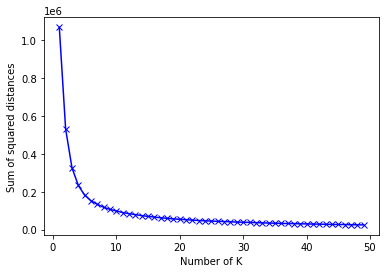

In [45]:
from sklearn.cluster import KMeans 

# Ï†ÅÏ†àÌïú k Í∞í Ï∞æÍ∏∞
sum_of_squared_distances = []
K = range(1, 50)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df_genre[genre_columns])
  sum_of_squared_distances.append(km.inertia_)

plt.xlabel('Number of K')
plt.ylabel('Sum of squared distances')
plt.plot(K, sum_of_squared_distances, 'bx-');

In [46]:
# 10Í∞úÏùò Ïû•Î•¥ Íµ∞Ïßë
km = KMeans(n_clusters=10)
genres_pred = km.fit_predict(df_track[genre_columns])
genres_pred

array([5, 7, 1, ..., 1, 9, 0], dtype=int32)

In [47]:
df_track['genre'] = genres_pred.T
df_track.head()

acousticness                artists  danceability  ...  year  duration_m  genre
0        0.0330    ['Hogsnort Rupert']         0.430  ...  2010    2.947550      5
1        0.0190          ['Davenport']         0.628  ...  2010    3.533883      7
2        0.0595        ['Chris Mills']         0.658  ...  2010    4.237333      1
3        0.1470           ['Maroon 5']         0.603  ...  2010    3.775117      7
4        0.0302  ['Never Shout Never']         0.684  ...  2010    2.842667      0

[5 rows x 17 columns]

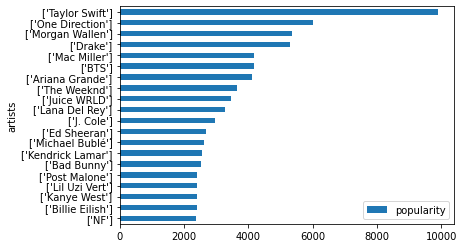

In [48]:
# Ïù∏Í∏∞ ÏïÑÌã∞Ïä§Ìä∏ ÌôïÏù∏ (2010~2021 ÎÇòÏò® ÎÖ∏Îûò)
artists_grp = df_track.groupby(['artists'])
artists_top = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
artists_top.sort_values(by=['popularity']).plot.barh();

üëâ ÏïÑÌã∞Ïä§Ìä∏ Î≥ÑÎ°ú ÎÖ∏ÎûòÏùò popularity Î•º ÎàÑÏ†ÅÌïú Í≤∞Í≥º ÏÉÅÏúÑ 20Í∞úÏûÖÎãàÎã§. Taylor Swift Í∞Ä ÏïïÎèÑÏ†ÅÏù∏ popularity ÎàÑÏ†ÅÎüâÏùÑ Í∞ÄÏßëÎãàÎã§. 2010ÎÖÑ Î∂ÄÌÑ∞Ïùò Îç∞Ïù¥ÌÑ∞Ïù∏ÎßåÌÅº ÎπÑÍµêÏ†Å ÏµúÍ∑ºÏóê ÌûàÌä∏Í≥°ÏùÑ Íæ∏Ï§ÄÌûà ÎÉàÏóàÎçò ÏïÑÌã∞Ïä§Ìä∏Îì§Ïù¥ Î≥¥ÏûÖÎãàÎã§. ÏïÑÌã∞Ïä§Ìä∏ Î≥ÑÎ°ú popularity Í∞Ä Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Í≤ÉÏúºÎ°ú Ï∂îÏ∏°Îê©ÎãàÎã§. 

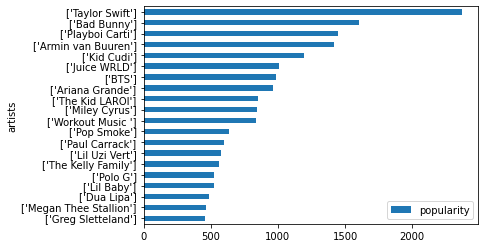

In [49]:
# Ïù∏Í∏∞ ÏïÑÌã∞Ïä§Ìä∏ ÌôïÏù∏ (2020 ÎÖ∏Îûò)
artists_grp = df_track[(df_track['year'] == 2020)].groupby(['artists'])
artists_top = artists_grp[['popularity']].sum().sort_values(by=['popularity'], ascending=False)[:20]
artists_top.sort_values(by=['popularity']).plot.barh();

üëâ 2020ÎÖÑÏóê Î∞úÌëúÌïú ÎÖ∏Îûò Ï§ëÏóêÎäî Ïó¨Ï†ÑÌûà Taylor Swift Í∞Ä 1ÏúÑÏù¥ÏßÄÎßå, Bad Bunny, Playboi Carti Îì± ÏÉàÎ°úÏö¥ ÏïÑÌã∞Ïä§Ìä∏ÎèÑ Î≥¥ÏûÖÎãàÎã§.  

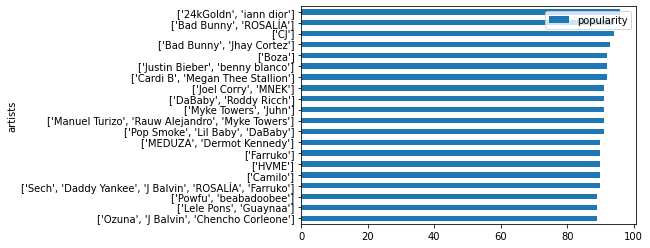

In [50]:
# Ïù∏Í∏∞ ÏïÑÌã∞Ïä§Ìä∏ ÌôïÏù∏ (2010~2021 ÎÇòÏò® ÎÖ∏Îûò 'ÌèâÍ∑†')
artists_grp = df_track.groupby(['artists'])
artists_top = artists_grp[['popularity']].mean().sort_values(by=['popularity'], ascending=False)[:20]
artists_top.sort_values(by=['popularity']).plot.barh();

üëâ ÎÖ∏Îûò Ïù∏Í∏∞Ïùò ÌèâÍ∑†ÏúºÎ°ú ÏÇ¥Ìé¥Î≥¥Î©¥, ÏΩúÎùºÎ≥¥Î•º ÌÜµÌï¥ ÎÖ∏ÎûòÎ•º Î∞úÌëúÌïú ÏïÑÌã∞Ïä§Ìä∏Îì§Ïù¥ ÎåÄÎ∂ÄÎ∂ÑÏûÖÎãàÎã§. ÏΩúÎùºÎ≥¥Î•º ÌÜµÌï¥ Îçî ÏÉàÎ°≠Í≥† ÏôÑÏÑ±ÎèÑ ÏûàÎäî ÏûëÏóÖÏúºÎ°ú Ïú†Ï†ÄÎì§Î°úÎ∂ÄÌÑ∞ Î∞òÏßù ÎÜíÏùÄ Ïù∏Í∏∞Î•º ÏñªÏùÄ ÎÖ∏ÎûòÎì§Î°ú Ï∂îÏ∏°Îê©ÎãàÎã§.

In [51]:
def feature_engineer(df):
  # ÌÉÄÏûÖ Î≥ÄÌôò
  df['key'] = df['key'].astype(str)
  df['genre'] = df['genre'].astype(str) # Ïù¥ÌõÑ ÎçîÎØ∏ Ïù∏ÏΩîÎî©

  # Ïú†ÏùòÎØ∏Ìïú Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
  # artists_popularity ÌäπÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥† artists ÌäπÏÑ±ÏùÄ ÎìúÎ°≠ -> Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÎ•º ÏùºÏúºÌÇ¥
  # artists_grp = df.groupby(['artists'])
  # artists_pop = artists_grp[['popularity']].sum()
  # artists_pop.rename(columns={'popularity': 'artists_popularity'}, inplace=True)
  
  # df = df.merge(artists_pop, on='artists')
  df.drop(columns=['artists'], inplace=True)

  return df

In [52]:
df_track = feature_engineer(df_track)

In [53]:
df_track.head()

acousticness  danceability  energy  ...  year  duration_m genre
0        0.0330         0.430   0.876  ...  2010    2.947550     5
1        0.0190         0.628   0.820  ...  2010    3.533883     7
2        0.0595         0.658   0.631  ...  2010    4.237333     1
3        0.1470         0.603   0.618  ...  2010    3.775117     7
4        0.0302         0.684   0.622  ...  2010    2.842667     0

[5 rows x 16 columns]

In [54]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26092 entries, 0 to 26246
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      26092 non-null  float64
 1   danceability      26092 non-null  float64
 2   energy            26092 non-null  float64
 3   explicit          26092 non-null  int64  
 4   instrumentalness  26092 non-null  float64
 5   key               26092 non-null  object 
 6   liveness          26092 non-null  float64
 7   loudness          26092 non-null  float64
 8   mode              26092 non-null  int64  
 9   popularity        26092 non-null  int64  
 10  speechiness       26092 non-null  float64
 11  tempo             26092 non-null  float64
 12  valence           26092 non-null  float64
 13  year              26092 non-null  int64  
 14  duration_m        26092 non-null  float64
 15  genre             26092 non-null  object 
dtypes: float64(10), int64(4), object(2)
memo

- Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏ ÌôïÏù∏

In [55]:
# 0~49, 50~100 -> 0, 1
df_track['popularity_score'] = np.where(df_track['popularity'] < 60, 0, 1)

In [56]:
df_track['popularity_score'].value_counts(normalize=True).sort_index()

0    0.716235
1    0.283765
Name: popularity_score, dtype: float64

## Î®∏Ïã†Îü¨Îãù Î™®Îç∏ Íµ¨Ï∂ï

- Î®∏Ïã†Îü¨Îãù Î™®Îç∏ Í∞úÎ∞ú (Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏Í≥ºÎèÑ ÎπÑÍµê)
  - Í≤∞Ï†ï Ìä∏Î¶¨
  - ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
  - XGBoost

In [57]:
# train, val, test Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ (60/20/20)
# popularity ÌäπÏÑ±Ïù¥ ÏµúÏã† Ïù∏Í∏∞ ÏßÄÌëú Îç∞Ïù¥ÌÑ∞(ex. Ïû¨ÏÉù ÌöüÏàò)Î•º Í∏∞Î∞òÏúºÎ°ú ÌïúÎ≤àÏóê ÏÇ∞Ï∂úÌïú Í≤∞Í≥ºÏù¥ÎØÄÎ°ú Î¨¥ÏûëÏúÑÎ°ú ÎÇòÎà†ÎèÑ Î¨¥Î∞©
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_track, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.25, random_state=2)

In [58]:
# Îç∞Ïù¥ÌÑ∞ÏóêÏÑú features, target Î∂ÑÎ¶¨
target = 'popularity_score'
features = df_track.columns.drop([target, 'popularity'])

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [59]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ :', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ :', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ÌõàÎ†® Ï†ïÌôïÎèÑ : 0.9990417784591797
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : 0.7654723127035831


üëâ Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏Î≥¥Îã§ ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. ÎòêÌïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Í≥ºÏ†ÅÌï©ÎêòÏóàÏùåÏùÑ ÏòàÏÉÅÌï† Ïàò ÏûàÏäµÎãàÎã§.

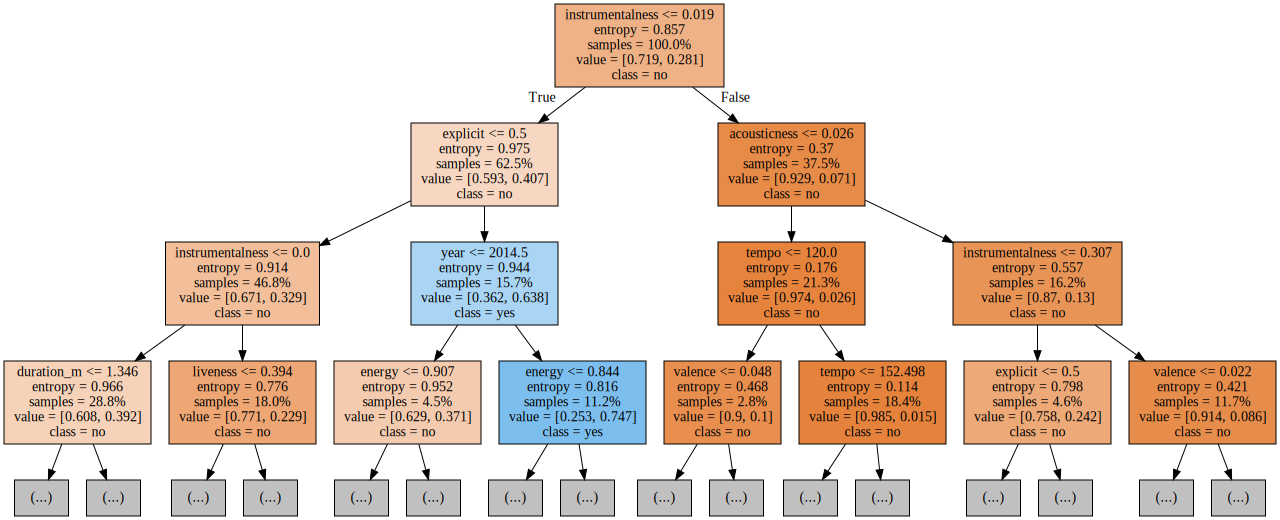

In [60]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

graph_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(graph_data))

üëâ Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÎ•º ÏùºÏúºÌÇ§Îäî ÌäπÏÑ±ÏùÄ ÌäπÎ≥ÑÌûà ÏóÜÏñ¥ Î≥¥ÏûÖÎãàÎã§. Í≤∞Ï†ï Ìä∏Î¶¨ Î™®Îç∏ÏóêÏÑúÎäî ÎÖ∏ÎûòÏóêÏÑú Í∞ÄÏÇ¨Í∞Ä Ï∞®ÏßÄÌïòÎäî Ï†ïÎèÑ, Í∞ÄÏÇ¨Ïùò ÎÇ¥Ïö© Í∑∏Î¶¨Í≥† Ïñ¥Ïø†Ïä§Ìã±Ìïú ÎÖ∏ÎûòÏù∏ÏßÄÍ∞Ä ÎÖ∏ÎûòÏùò Ïù∏Í∏∞Î•º ÏòàÏ∏°ÌïòÎäîÎç∞ Ï§ëÏöîÌïú Í∏∞Ï§ÄÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [61]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(
    OneHotEncoder(),
    RandomForestClassifier(n_estimators=300, random_state=2, n_jobs=-1)
)

pipe2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['key', 'genre'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estim

In [62]:
# Î™®Îç∏ ÌèâÍ∞Ä
from sklearn.metrics import classification_report

y_pred_val = pipe2.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      3742
           1       0.77      0.53      0.63      1477

    accuracy                           0.82      5219
   macro avg       0.80      0.74      0.76      5219
weighted avg       0.82      0.82      0.81      5219



üëâ ÌÅ¥ÎûòÏä§ 1Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏäµÎãàÎã§. Îã§Îßå ÌòÑÏû¨ ÌíÄÍ≥†Ïûê ÌïòÎäî Î¨∏Ï†úÏùò Í≤ΩÏö∞ 'ÌûàÌä∏ Ïπ† ÎÖ∏ÎûòÍ∞Ä ÏïÑÎãåÎç∞ ÌûàÌä∏Î•º Ïπ† Í≤ÉÏù¥Îã§' ÎùºÍ≥† ÏòàÏ∏°Ìï† Í≤ΩÏö∞Ïùò ÎπÑÏö© ÎÇ≠ÎπÑÍ∞Ä Îçî ÌÅ¨ÎØÄÎ°ú Ï†ïÎ∞ÄÎèÑÍ∞Ä Ï¢Ä Îçî Ï§ëÏöîÌïòÎã§Í≥† Î≥º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏπòÎ™ÖÏ†ÅÏù∏ Î¨∏Ï†úÎäî ÏïÑÎãôÎãàÎã§.

In [63]:
# Xgboost Classifier
from xgboost import XGBClassifier

pipe3 = make_pipeline(
    OneHotEncoder(),
    XGBClassifier(n_estimators=300, random_state=2, n_jobs=-1)
)

pipe3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['key', 'genre'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=300, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=2,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
    

In [64]:
# Î™®Îç∏ ÌèâÍ∞Ä
y_pred_val = pipe3.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3742
           1       0.75      0.61      0.67      1477

    accuracy                           0.83      5219
   macro avg       0.80      0.76      0.78      5219
weighted avg       0.83      0.83      0.83      5219



üëâ Ïù¥Ï†Ñ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Î≥¥Îã§ f1-score, accuracy Ï†êÏàòÍ∞Ä Ìñ•ÏÉÅÎêòÏóàÏäµÎãàÎã§.

In [65]:
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe3.predict_proba(X_val)[:, -1]
print('AUC score :', roc_auc_score(y_val, y_pred_proba))

AUC score : 0.8849624402969168


- Î®∏Ïã†Îü¨Îãù Î™®Îç∏ ÌäúÎãù
  - RandomSearchCV
  - ÏµúÏ¢Ö Î™®Îç∏ test Ï†êÏàò

In [66]:
from sklearn.model_selection import RandomizedSearchCV

pipe4 = make_pipeline(
    OneHotEncoder(),
    XGBClassifier(random_state=2, n_jobs=-1)
)

params = { # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
    'xgbclassifier__n_estimators': [100, 300, 500],
    'xgbclassifier__max_depth': [10, 15, None]
}

clf = RandomizedSearchCV(
    pipe4,
    params,
    n_iter=10,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=1
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.0min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('onehotencoder',
                                              OneHotEncoder(cols=None,
                                                            drop_invariant=False,
                                                            handle_missing='value',
                                                            handle_unknown='value',
                                                            return_df=True,
                                                            use_cat_names=False,
                                                            verbose=0)),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_byleve

In [67]:
clf.best_params_

{'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 500}

In [68]:
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌõÑ AUC Ï†êÏàò
y_pred_proba = clf.predict_proba(X_val)[:, -1]
print('AUC score :', roc_auc_score(y_val, y_pred_proba))

AUC score : 0.8906453379034379


üëâ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌõÑ AUC Ï†êÏàòÍ∞Ä Ìñ•ÏÉÅÎêòÏóàÏäµÎãàÎã§.

In [69]:
# Î™®Îç∏ ÌèâÍ∞Ä (ÌÖåÏä§Ìä∏ÏÖã)
y_pred_proba = clf.predict_proba(X_test)[:, -1]
print('AUC score :', roc_auc_score(y_test, y_pred_proba))

AUC score : 0.8775455488459445


üëâ AUC Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï¢ãÏùÄ Î™®Îç∏Ïù∏ Í≤ÉÏúºÎ°ú ÌåêÎã®Ìï† Ïàò ÏûàÏäµÎãàÎã§.

- Î®∏Ïã†Îü¨Îãù Î™®Îç∏ Ìï¥ÏÑù
  - PDP
  - SHAP
  - Ïñ¥Îñ§ ÌäπÏÑ±Ïù¥ ÌïÑÏöîÌï†ÏßÄ
  - Î™®Îç∏Ïùò ÌïúÍ≥Ñ

In [70]:
model = clf.best_estimator_.named_steps['xgbclassifier']
X_test_transformed = clf.best_estimator_.named_steps['onehotencoder'].transform(X_test)

In [71]:
y_test.iloc[[1500]]

23466    1
Name: popularity_score, dtype: int64

In [72]:
y_test_temp = model.predict(X_test_transformed.iloc[[1500]])
y_test_temp

array([1])

In [73]:
import shap

explainer = shap.TreeExplainer(model)
row = X_test_transformed.iloc[[1500]]
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

üëâ Ïù¥ ÎÖ∏ÎûòÍ∞Ä Ïù∏Í∏∞Í∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïóê ÌôïÎ•†ÏùÑ ÎÜíÏó¨Ï§Ä ÌäπÏÑ±Îì§ÏùÑ ÏòÅÌñ•Ïù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú ÌôïÏù∏Ìï¥Î≥¥Î©¥, Í∞ÄÏÇ¨Ïóê ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö©Ïù¥ ÏûàÍ≥† Í∞ÄÏÇ¨Í∞Ä ÎßéÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ Îû©Ïù¥ Îì§Ïñ¥Í∞Ñ  ÌûôÌï© Í≥ÑÏó¥Ïùò ÎÖ∏ÎûòÏûÑÏùÑ Ï∂îÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§. 2020ÎÖÑÏóê Î∞úÌëúÌïú ÎÖ∏ÎûòÏù¥Î©∞ energy Í∞Ä 0.609 Î°ú Ïï°Ìã∞Î∏åÌïú ÎÖ∏ÎûòÏûÑÏùÑ Ïïå Ïàò ÏûàÍ≥† ÌÖúÌè¨Í∞Ä 83 bpm Ï†ïÎèÑÏûÖÎãàÎã§. 

In [74]:
y_test_temp = model.predict(X_test_transformed.iloc[[3500]])
y_test_temp

array([0])

In [75]:
row = X_test_transformed.iloc[[3500]]
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

üëâ Ïù¥ ÎÖ∏ÎûòÍ∞Ä Ïù∏Í∏∞Í∞Ä ÏóÜÏùÑ Í∞ÄÎä•ÏÑ±Ïóê ÌôïÎ•†ÏùÑ ÎÜíÏó¨Ï§Ä ÌäπÏÑ±Îì§ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Î©¥, energy Í∞Ä 0.955 Î°ú, Ìà¨Î®∏ÏπòÌïú Í∏¥Ïû•Í∞êÍ≥º Ïï°Ìã∞Î∏åÌï®Ïùò ÎÖ∏ÎûòÏûÑÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÎòêÌïú Ïù¥Ï†ÑÏóê ÏÇ¥Ìé¥Î≥∏ ÎÖ∏ÎûòÎ≥¥Îã§ ÌÖúÌè¨Í∞Ä Îçî Îπ†Î•¥Î©∞, Ïù¥ ÎÖ∏Îûò Í∞ÄÏÇ¨ÏóêÎäî ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö©ÏùÄ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏäµÎãàÎã§. ÏúÑÏóêÏÑú ÏÇ¥Ìé¥Î≥∏ ÌûàÌä∏ Ïπ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî ÎÖ∏ÎûòÏôÄ Í∞ôÏùÄ 2020ÎÖÑÏóê Î∞úÌëú, Ïï°Ìã∞Î∏åÌïòÍ≥† Îû©Ïù¥ Îì§Ïñ¥Í∞Ñ Í≤ÉÏúºÎ°ú ÏòàÏ∏°Ìï† Ïàò ÏûàÎäî ÎÖ∏ÎûòÏù¥ÏßÄÎßå, Î≥¥Îã§ Îπ†Î•∏ ÌÖúÌè¨ÏôÄ Ïã¨Ìïú Í∏¥Ïû•Í∞êÏù¥ ÎÖ∏ÎûòÏùò Ïù∏Í∏∞Î•º ÎÇÆÏ∂îÎäî ÏöîÏù∏ÏúºÎ°ú ÏûëÏö©Ìïú Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

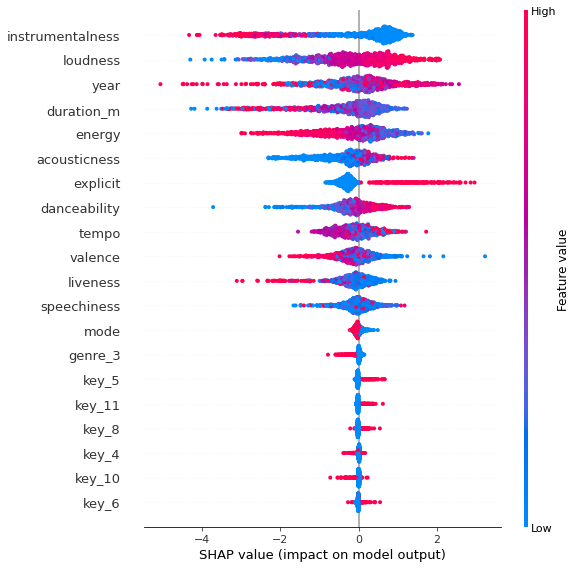

In [76]:
sample = X_test_transformed.iloc[:1000]
shap_values = explainer.shap_values(sample)

shap.initjs()
shap.summary_plot(
    shap_values=shap_values, 
    features=sample
)

üëâ Îç∞ÏãúÎ≤®Ïù¥ Î≥¥Îã§ ÎÜíÍ≥†, ÎÖ∏ÎûòÏùò Í∏¥Ïû•Í∞ê Ïï°Ìã∞Î∏åÌï®Ïù¥ ÎçúÌï†ÏàòÎ°ù, Í∞ÄÏÇ¨Ïóê ÏûêÍ∑πÏ†ÅÏù∏ ÎÇ¥Ïö©Ïù¥ Ìè¨Ìï®ÎêòÍ≥†, Ï°∞Í∏àÏùÄ Ïñ¥Ïø†Ïä§Ìã±ÌïòÍ≥†, ÎåÑÏä§Í≥°ÏúºÎ°ú Ïñ¥Ïö∏Î¶¨Îäî ÎÖ∏ÎûòÏùºÏàòÎ°ù ÌûàÌä∏ Ïπ† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßêÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÎòêÌïú ÏùòÏô∏Î°ú Í∏çÏ†ïÏ†ÅÏù∏ ÎÖ∏ÎûòÎ≥¥Îã§ sad, depressed Ìïú Î∂ÑÏúÑÍ∏∞Ïùò ÎÖ∏ÎûòÏùºÏàòÎ°ù Ïù∏Í∏∞Í∞Ä ÎßéÏùÄÎç∞ Ïù¥Îäî ÎÖ∏ÎûòÍ∞Ä Ïò§ÌûàÎ†§ ÏïîÏö∏Ìïú Î∂ÄÎ∂ÑÏùÑ ÎìúÎü¨ÎÇºÏàòÎ°ù Ïú†Ï†ÄÍ∞Ä Ïä¨Ìîà Í∞êÏÑ±Ïóê Ï†ñÏñ¥Îì§Î©∞ ÎÖ∏ÎûòÏóê Í≥µÍ∞êÌïòÍ±∞ÎÇò ÏúÑÎ°úÎ•º Î∞õÏùÑ Ïàò ÏûàÏùåÏùÑ Ïú†Ï∂îÌï† Ïàò ÏûàÏäµÎãàÎã§. ÎçîÎ∂àÏñ¥ ÎÖ∏ÎûòÏùò ÏãúÏûëÏù¥ Îã®Ï°∞Ïù∏ Í≤ÉÎ≥¥Îã§ Ïû•Ï°∞Ïùº Îïå, ÎÖ∏ÎûòÏùò Ï£ºÏöî Key Í∞Ä 'F', 'B', 'G#', 'F#' ÏùºÏàòÎ°ù Ïù∏Í∏∞Í∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßëÎãàÎã§. Î∞òÎåÄÎ°ú Ï£ºÏöî Key Í∞Ä 'A#', 'E' Ïù∏ Í≤ΩÏö∞ Ïù∏Í∏∞Í∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ Îñ®Ïñ¥Ïßà Ïàò ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

‚úîÔ∏è Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú, ÏïÑÌã∞Ïä§Ìä∏Ïùò Ïù∏Í∏∞ÎèÑ Îß§Ïö∞ Ï§ëÏöîÌïú ÌäπÏÑ±Ïù¥ÏßÄÎßå ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏïÑÌã∞Ïä§Ìä∏Ïùò Ïù∏Í∏∞ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎìúÎäî Í≥ºÏ†ïÏóê ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÎàÑÏàòÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§. Ï¶â, ÏïÑÌã∞Ïä§Ìä∏Ïùò Ïù∏Í∏∞ÎèÑÎ•º Ïïå Ïàò ÏûàÎäî Í∞ùÍ¥ÄÏ†ÅÏù∏ ÏßÄÌëúÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌäπÏÑ±Ïù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÖÎãàÎã§.



> Ïä§Ìè¨Ìã∞ÌååÏù¥Ïóê Îì±Î°ùÎêú ÏùåÏõê Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Í∏ÄÎ°úÎ≤å ÎÆ§ÏßÅ Ìä∏Î†åÎìúÎ•º ÏùåÏïÖÏ†ÅÏù∏ ÌäπÏÑ±Îì§Î°ú ÏÑ∏Î∂ÑÌôîÌï¥ ÌååÏïÖÌï† Ïàò ÏûàÏóàÏäµÎãàÎã§. Ïù¥ÌõÑ Î∂ÑÏÑùÌïú Ìä∏Î†åÎìúÎ•º Ï∞∏Í≥†Ìï¥ **Ïã†Í≥° Í∏∞Ìöç Î∞è ÏûëÍ≥°Ïóê Î†àÌçºÎü∞Ïä§Î°ú ÌôúÏö©**Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÌï©ÎãàÎã§. ÎòêÌïú Îç∞Î™®Í∞Ä ÏôÑÏÑ±ÎêòÎ©¥ ÎÖ∏ÎûòÏóêÏÑú ÏñªÏùÑ Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î™®Îç∏ÏùÑ ÌÜµÌï¥ **ÎÖ∏ÎûòÍ∞Ä Í∏ÄÎ°úÎ≤å ÏùåÏïÖ ÏãúÏû•ÏóêÏÑú ÌûàÌä∏ Ïπ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùÑÏßÄ ÏòàÏ∏°**Ìï¥ Î≥º Ïàò ÏûàÍ≤†ÏäµÎãàÎã§. 

